In [141]:
import cv2 
import matplotlib.pyplot as plt
from collections import Counter
import statistics

import numpy as np
import pandas as pd

img = cv2.imread('Lenna.png', )
h, w, channel = img.shape

max_x = w - 1 
max_y = h - 1

In [151]:
imgHSV =cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow('HSV pic',imgHSV)
cv2.imshow('source pic',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [129]:
H = []
S = []
V = []

for i in range(max_y):
    for j in range(max_x):
        pix_val = imgHSV[i,j]
        H.append(pix_val[0])
        S.append(pix_val[1])
        V.append(pix_val[2])
        #print("HSV value ({},{}) = ({})".format(i, j, pix_val))

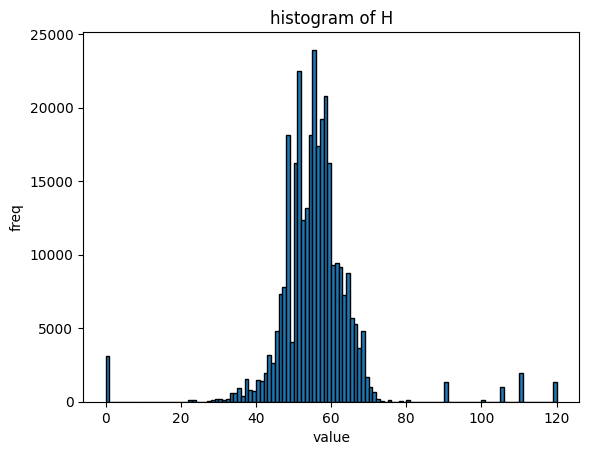

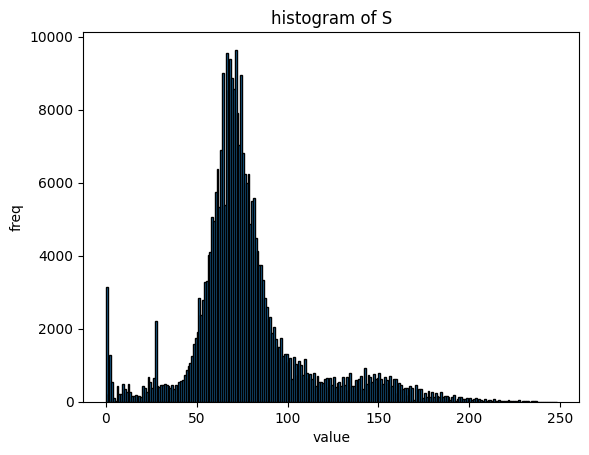

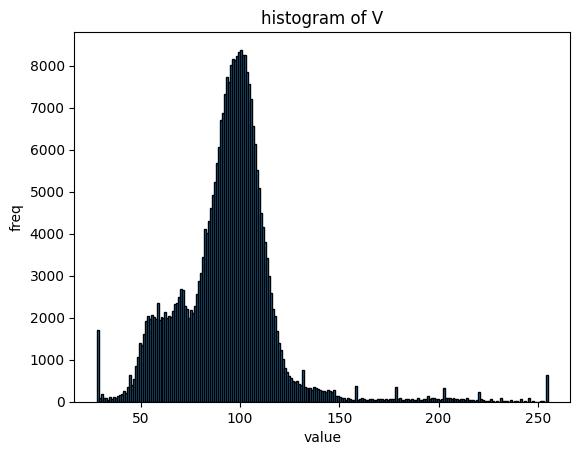

In [148]:
plt.hist(H, bins = range(min(H), max(H) + 1),
            edgecolor='black')
plt.xlabel('value')
plt.ylabel('freq')
plt.title('histogram of H')
plt.show()

plt.hist(S, bins = range(min(S), max(S) + 1),
            edgecolor='black')
plt.xlabel('value')
plt.ylabel('freq')
plt.title('histogram of S')
plt.show()

plt.hist(V, bins = range(min(V), max(V) + 1),
            edgecolor='black')
plt.xlabel('value')
plt.ylabel('freq')
plt.title('histogram of V')
plt.show()

In [143]:
# Otsu to select V treshold
list_infra = []
list_inter = []

for t in range(0, max(V)+1):
    elements_less_than_t = [element for element in V if element < t]
    elements_more_than_t = [element for element in V if element >= t]

    counter_elements_less_than_t = Counter(elements_less_than_t)
    counter_elements_more_than_t = Counter(elements_more_than_t)

    w0_t = sum(counter_elements_less_than_t[i] for i in range(t))
    w1_t = sum(counter_elements_more_than_t[i] for i in range(t,max(V)+1))

    mu0_t = 0 if t == 0 else np.mean(elements_less_than_t)
    mu1_t = np.mean(elements_more_than_t)

    sigma0_squared_t = 0 if t == 0 else np.var(elements_less_than_t)
    sigma1_squared_t = np.var(elements_more_than_t)

    infra_class_variance = w0_t * sigma0_squared_t + w1_t * sigma1_squared_t
    inter_class_variance = w0_t * w1_t * (mu0_t - mu1_t)**2

    list_infra.append(infra_class_variance)
    list_inter.append(inter_class_variance)

In [147]:
max_inter_value = max(list_inter)
max_inter_indices = [i for i, value in enumerate(list_inter) if value == max_inter_value]

min_infra_value = min(list_infra)
min_infra_indices = [i for i, value in enumerate(list_infra) if value == min_infra_value]
print("\n====================================================\n")
print("Maximum Inter-class Variance:", max_inter_value)
print("Corresponding t values at indices:", max_inter_indices)
print()
print("Minimum Infra-class Variance:", min_infra_value)
print("Corresponding t values at indices:", min_infra_indices)



Maximum Inter-class Variance: 29561446550632.504
Corresponding t values at indices: [88]

Minimum Infra-class Variance: 106354006.53482944
Corresponding t values at indices: [88]


In [120]:
print(list_inter)
print(list_infra)

[0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 2306286181840.0366, 2431296205956.705, 2668600760224.777, 2767468169705.989, 2885834602693.9155, 2937826397042.722, 3053827811635.623, 3130213413281.092, 3253588504319.823, 3333434559984.77, 3453413820305.481, 3607547708181.5576, 3769010285904.815, 3978772736357.586, 4153206204742.062, 4423808281352.789, 4904888765082.827, 5200963393302.563, 5584404852120.769, 6157582743718.101, 6853929999166.715, 7744368419987.95, 8572392744474.439, 9520973117287.834, 10616454983528.488, 11740032058690.492, 12787867555799.412, 13847052424160.277, 14841583243243.607, 15779460304600.398, 16853623667189.406, 17709693397443.777, 18550183332843.02, 19339767351856.184, 20150833476183.145, 20871091118736.074, 21565876369867.723, 22216677643954.72, 22874622002864.203, 23540890176161.844, 24171955283004.36, 24796407752064.164, 25427692926323.793, 26008279907838.29, 2

In [152]:
for i in range(max_y):
    for j in range(max_x):
        pix_val = imgHSV[i,j]
        if(pix_val[2] < 100):
            imgHSV[i, j] = [0, 0, 0]
        else:
            imgHSV[i, j] = [255, 255, 255]


cv2.imshow('new HSV pic',imgHSV)
cv2.imshow('source pic',img)
cv2.waitKey(0)
cv2.destroyAllWindows()